In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install PyWavelets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import cv2
import base64

In [41]:
img = cv2.imread('./test_images/MESSI.jpg')
img.shape

(498, 332, 3)

In [42]:
#plt.imshow(img)

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(498, 332)

In [44]:
#plt.imshow(gray, cmap='gray')

In [45]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 80, 102, 162, 162]])

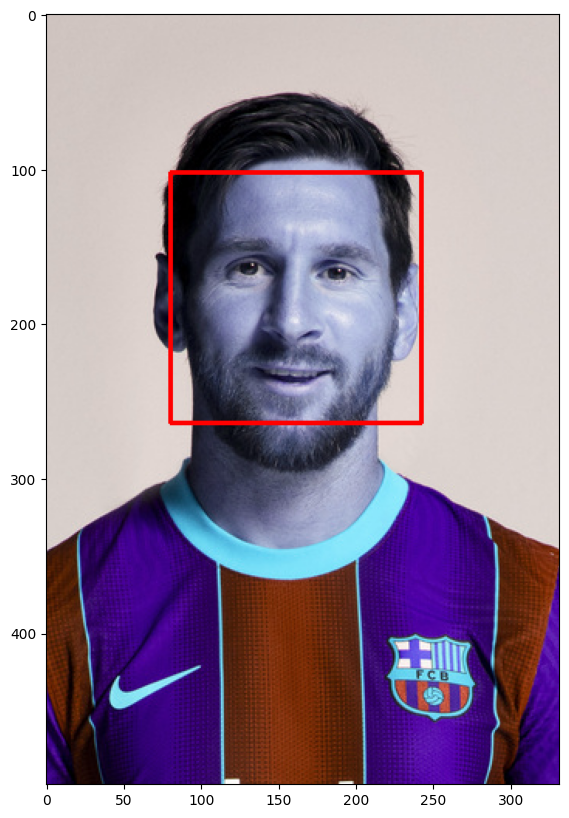

In [46]:
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

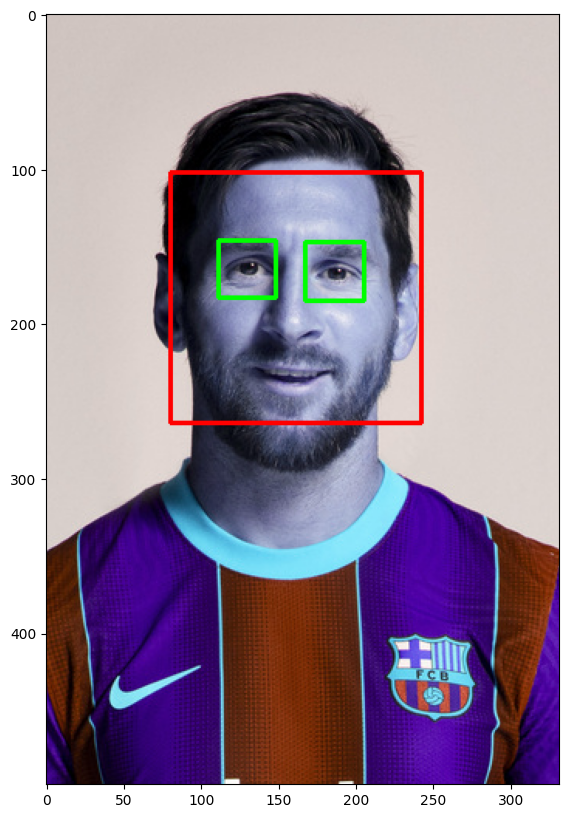

In [47]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

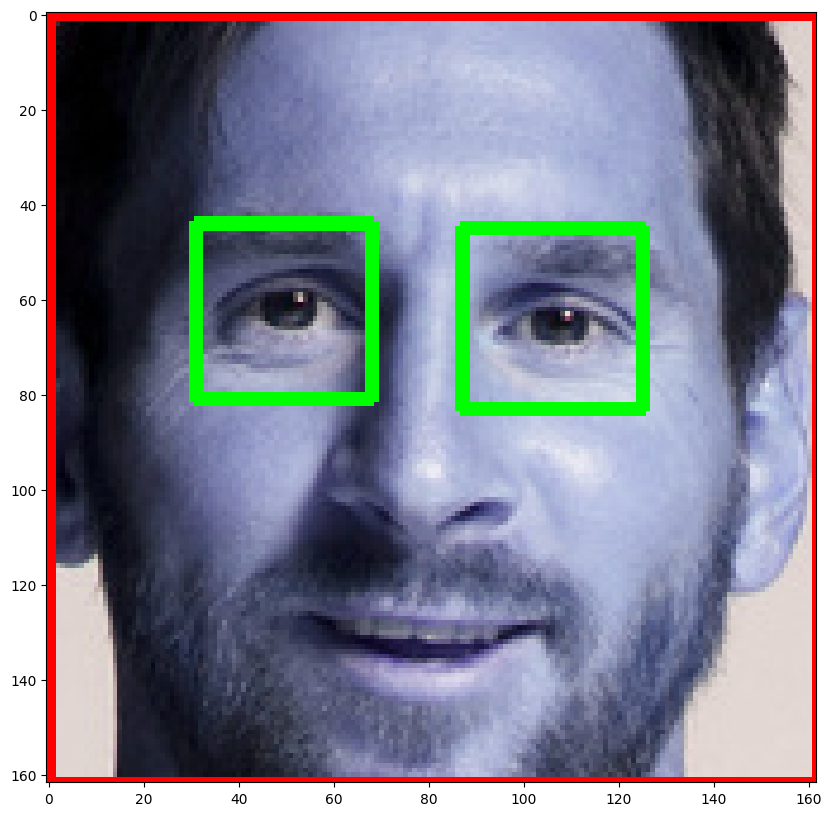

In [48]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
cropped_img = np.array(roi_color)

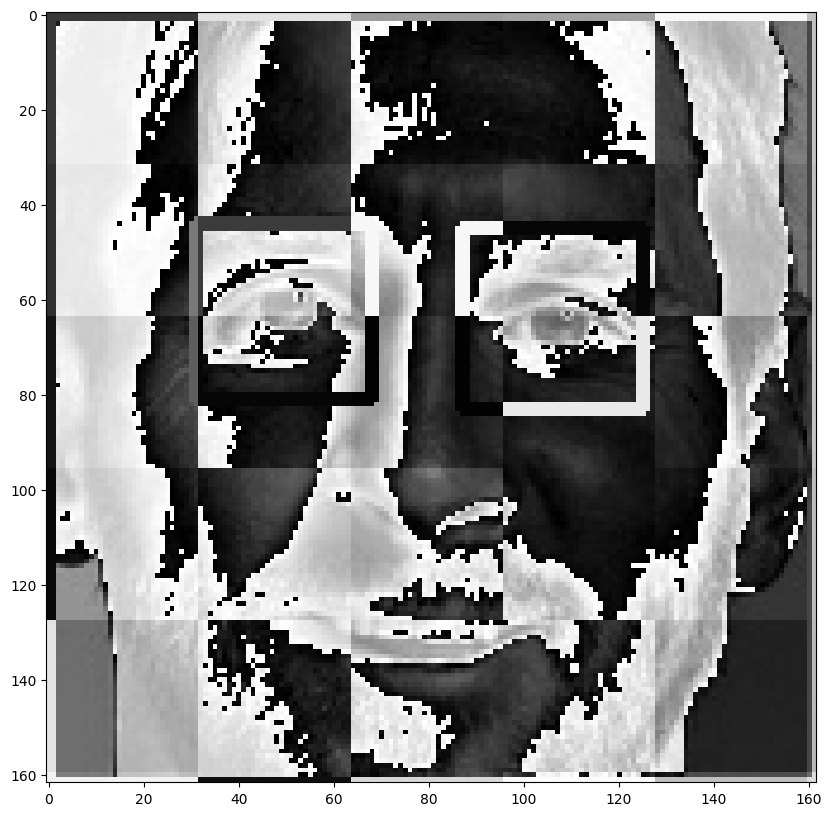

In [49]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

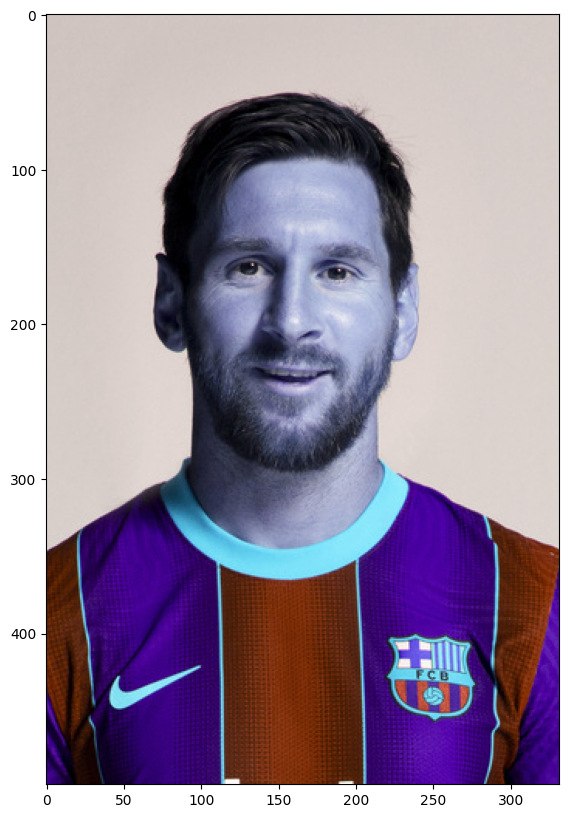

In [55]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
original_image = cv2.imread('./test_images/MESSI.jpg')
plt.imshow(original_image)




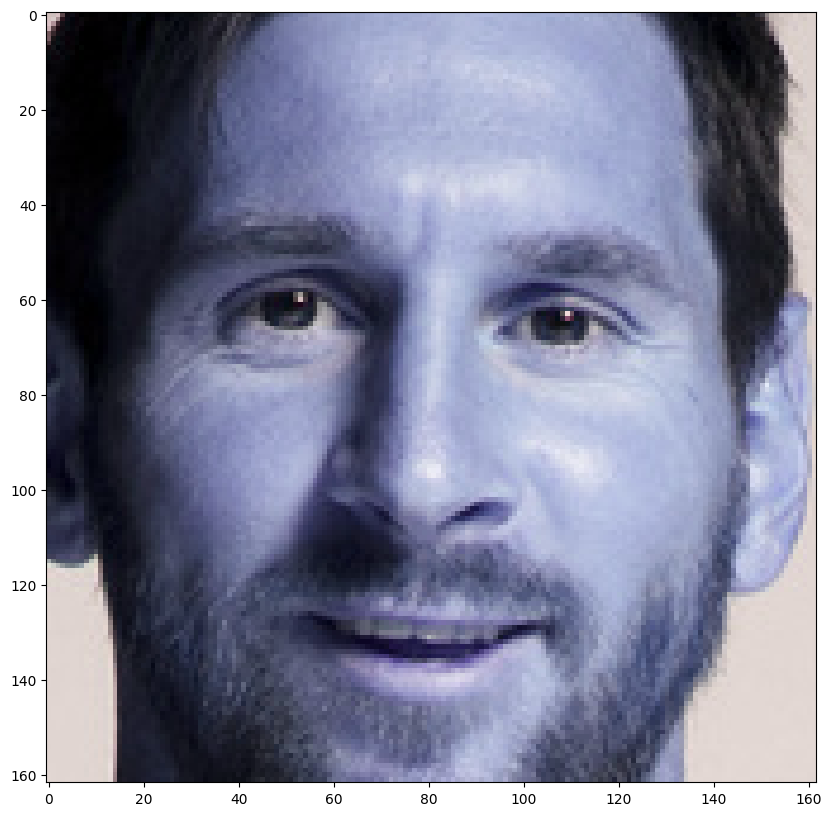

In [56]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/MESSI.jpg')
plt.imshow(cropped_image)


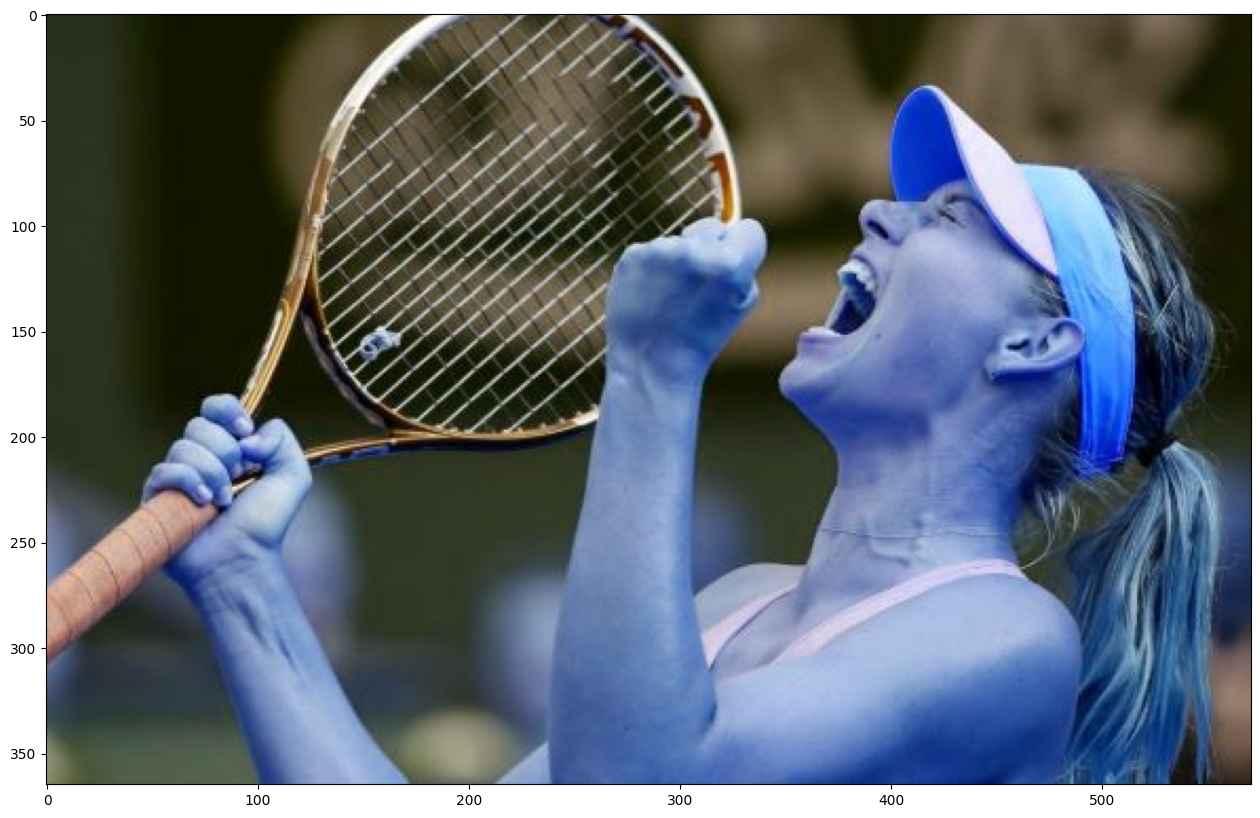

In [15]:
org_image_obstructed = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_no_2_eyes

In [17]:
path_to_data = "./images_dataset/"
path_to_cr_data = "./images_dataset/cropped/"
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./images_dataset/cropped',
 './images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

In [18]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./images_dataset/cropped/roger_federer
Generating cropped images in folder:  ./images_dataset/cropped/serena_williams
Generating cropped images in folder:  ./images_dataset/cropped/virat_kohli


In [19]:
 class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [20]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)#vertically stacked wavelet and regular image
        y.append(class_dict[celebrity_name]) #celebrity number corresponding to a celebrity name, according to class_dict

In [21]:
np.shape(X[0])#X is just a collection of vertically stacked images, each being a combination of normal and wavelet transformed


(4096, 1)

In [22]:
X = np.array(X).reshape(len(X),4096).astype(float)#to avoid warnings from the sklearn APIs about the data type
X.shape

(187, 4096)

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8723404255319149

In [24]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.89      0.80      0.84        10
           2       0.89      1.00      0.94         8
           3       0.80      0.67      0.73         6
           4       0.90      0.82      0.86        11
           5       0.86      1.00      0.92        12

    accuracy                           0.87        47
   macro avg       0.87      0.86      0.86        47
weighted avg       0.87      0.87      0.87        47



In [25]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [26]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.721429,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.578571,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.735714,{'logisticregression__C': 1}


In [27]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [28]:
print(best_estimators['svm'].score(X_test,y_test))
print(best_estimators['random_forest'].score(X_test,y_test))
print(best_estimators['logistic_regression'].score(X_test,y_test))

0.8085106382978723
0.6170212765957447
0.8723404255319149


In [29]:
best_estimators['random_forest'].score(X_test,y_test)

0.6170212765957447

In [30]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8723404255319149

In [31]:
best_clf = best_estimators['svm']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  1,  1,  1],
       [ 0,  8,  0,  0,  0],
       [ 2,  0,  3,  1,  0],
       [ 0,  1,  0,  9,  1],
       [ 0,  0,  1,  0, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

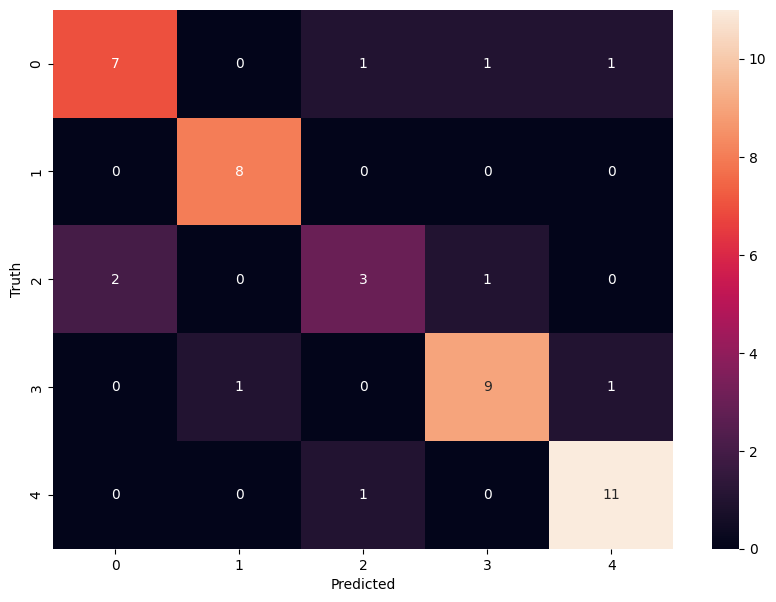

In [32]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [177]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip available: 22.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [33]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [34]:
def get_b64test():
    with open('rog.txt') as f:
        return f.read()
    


In [35]:
def get_cv2_image_from_base64_string(b64str):
    encoded_data = b64str.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

In [40]:
def classify_image(image_base64_data, file_path=None):
    imgs = get_cropped_image_if_2_eye(file_path, image_base64_data)

    result = []
    for img in imgs:
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        
        combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))

        len_image_array = 32*32*3 + 32*32

        final = combined_img.reshape(1,len_image_array).astype(float)
       
        result.append({
            'class': class_number_to_name(__model.predict(final)[0]),
            'class_probability': np.around(__model.predict_proba(final)*100,2).tolist()[0],
            'class_dictionary': __class_name_to_number
        })

    return result
classify_image1(get_b64test(),None)

[{'class': 'roger_federer',
  'class_probability': [5.26, 2.36, 80.76, 4.95, 6.67],
  'class_dictionary': {'lionel_messi': 0,
   'maria_sharapova': 1,
   'roger_federer': 2,
   'serena_williams': 3,
   'virat_kohli': 4}}]

In [37]:
def get_cropped_image_if_2_eye(image_path, image_base64_data):
    face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

    if image_path:
        img = cv2.imread(image_path)
    else:
        img = get_cv2_image_from_base64_string(image_base64_data)
        

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    print(faces)
    cropped_faces = []
    for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                cropped_faces.append(roi_color)
    return cropped_faces  

In [38]:
__class_name_to_number = {}
__class_number_to_name = {}
def class_number_to_name(class_num):
    return __class_number_to_name[class_num]


In [39]:
import joblib
import json
import numpy as np
import base64
import cv2


__class_name_to_number = {}
__class_number_to_name = {}

__model = None

def classify_image1(image_base64_data, file_path=None):

    imgs = get_cropped_image_if_2_eyes(file_path, image_base64_data)

    result = []
    for img in imgs:
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))

        len_image_array = 32*32*3 + 32*32

        final = combined_img.reshape(1,len_image_array).astype(float)
        result.append({
            'class': class_number_to_name(__model.predict(final)[0]),
            'class_probability': np.around(__model.predict_proba(final)*100,2).tolist()[0],
            'class_dictionary': __class_name_to_number
        })

    return result

def class_number_to_name(class_num):
    return __class_number_to_name[class_num]

def load_saved_artifacts():
    print("loading saved artifacts...start")
    global __class_name_to_number
    global __class_number_to_name

    with open("./artifacts/class_dictionary.json", "r") as f:
        __class_name_to_number = json.load(f)
        __class_number_to_name = {v:k for k,v in __class_name_to_number.items()}

    global __model
    if __model is None:
        with open('./artifacts/saved_model.pkl', 'rb') as f:
            __model = joblib.load(f)
    print("loading saved artifacts...done")


def get_cv2_image_from_base64_string(b64str):
    '''
    credit: https://stackoverflow.com/questions/33754935/read-a-base-64-encoded-image-from-memory-using-opencv-python-library
    :param uri:
    :return:
    '''
    encoded_data = b64str.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

def get_cropped_image_if_2_eyes(image_path, image_base64_data):
    face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

    if image_path:
        img = cv2.imread(image_path)
    else:
        img = get_cv2_image_from_base64_string(image_base64_data)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    cropped_faces = []
    for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                cropped_faces.append(roi_color)
    return cropped_faces  



def get_b64_test_image_for_virat():
    with open("b64.txt") as f:
        return f.read()

if __name__ == '__main__':
    load_saved_artifacts()

    print(classify_image(get_b64_test_image_for_virat(), None))


loading saved artifacts...start
loading saved artifacts...done
()
[]
